In [11]:
import sys
sys.path.append('../')

from cube import Cube
from mcts_steps_taken import MCTS
from astar import Astar
from bfs import BFS

import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

import pickle

plt.rcParams['figure.figsize'] = [15, 8]

In [12]:
max_scramble_depth = 5
num_per_scramble_depth = 30
num_iterations_per_solve = 200_000

# MCTS or Astar
# algorithm = MCTS(c = 5, nu = 0.1, num_iter = num_iterations_per_solve)
# algorithm = Astar(lam = 1, num_iter = num_iterations_per_solve, network_type = 'resnet')
# algorithm = BFS(num_iter = num_iterations_per_solve)

In [47]:
from os.path import exists
import os

type_file_translations={
    "mcts": "steps_to_solve_mcts.pickle",
    "astar": "steps_to_solve_astar.pickle",
    "astar_resnet": "steps_to_solve_astar_resnet.pickle",
    "bfs": "steps_to_solve_bfs.pickle"
}

def retrieve_experiment_data(type):
    type_path = "./experiment_results/"+type_file_translations[type]
    if exists(type_path):
        with open(type_path, 'rb') as exp_file:
            return pickle.load(exp_file)
    
    return None

In [38]:
retrieve_experiment_data("mcts")

{'total_attempts': [30, 30, 30, 30, 30],
 'averages_of_succesful_attempts': [2.9,
  8.566666666666666,
  36.833333333333336,
  367.3,
  4200.266666666666],
 'stds_of_succesful_attempts': [0.30000000000000004,
  10.582007791004923,
  38.16724890385589,
  566.3139971193837,
  7407.940689707378]}

# MCTS

In [13]:
algorithm = MCTS(c = 5, nu = 0.1, num_iter = num_iterations_per_solve)

In [14]:
total_attempts = []
averages_of_succesful_attempts = []
stds_of_succesful_attempts = []

for scramble_depth in range(1, max_scramble_depth + 1):
    number_of_attempts = 0
    succesful_attempts_lengths = []
    for _ in tqdm(range(num_per_scramble_depth)):
        while True:
            cube = Cube()
            cube.scramble(scramble_depth)
            solution, steps_taken = algorithm.solve(cube, num_iterations_per_solve, return_steps_taken = True)
            number_of_attempts += 1
            if solution is not None:
                break
        succesful_attempts_lengths.append(steps_taken)
    print('Attempts: ', succesful_attempts_lengths)
    print('Mean: ', np.mean(succesful_attempts_lengths))
    print("Std: ", np.std(succesful_attempts_lengths))
    total_attempts.append(number_of_attempts)
    averages_of_succesful_attempts.append(np.mean(succesful_attempts_lengths))
    stds_of_succesful_attempts.append(np.std(succesful_attempts_lengths))

mcts_data = {
    'total_attempts': total_attempts,
    'averages_of_succesful_attempts': averages_of_succesful_attempts,
    'stds_of_succesful_attempts': stds_of_succesful_attempts
}

with open('experiment_results/steps_to_solve_mcts.pickle', 'wb') as f_mcts:
    pickle.dump(mcts_data, f_mcts,protocol=pickle.HIGHEST_PROTOCOL)

100%|██████████| 30/30 [00:00<00:00, 202.75it/s]


Attempts:  [3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Mean:  2.9
Std:  0.30000000000000004


100%|██████████| 30/30 [00:00<00:00, 98.70it/s] 


Attempts:  [5, 7, 5, 9, 3, 5, 5, 5, 6, 5, 5, 5, 7, 5, 5, 4, 7, 56, 5, 5, 5, 5, 9, 9, 35, 5, 18, 5, 4, 3]
Mean:  8.566666666666666
Std:  10.582007791004923


100%|██████████| 30/30 [00:01<00:00, 22.82it/s]


Attempts:  [49, 75, 9, 6, 7, 46, 20, 11, 8, 112, 9, 86, 32, 84, 59, 5, 21, 8, 56, 27, 20, 27, 65, 7, 33, 6, 14, 174, 7, 22]
Mean:  36.833333333333336
Std:  38.16724890385589


100%|██████████| 30/30 [00:13<00:00,  2.21it/s]


Attempts:  [36, 386, 5, 32, 1572, 5, 13, 357, 101, 41, 1685, 311, 27, 700, 187, 118, 694, 28, 2366, 48, 112, 23, 69, 217, 7, 591, 19, 326, 34, 909]
Mean:  367.3
Std:  566.3139971193837


100%|██████████| 30/30 [02:42<00:00,  5.43s/it]

Attempts:  [207, 1325, 170, 23, 738, 19661, 17922, 784, 1746, 234, 372, 134, 4252, 7, 32782, 10, 936, 386, 116, 773, 5108, 7563, 3409, 114, 114, 821, 7077, 296, 14063, 4865]
Mean:  4200.266666666666
Std:  7407.940689707378


Total attempts: [30, 30, 30, 30, 30]


Text(0.5, 1.0, 'Average number of steps taken by the MCTS implementation with different scrambles')

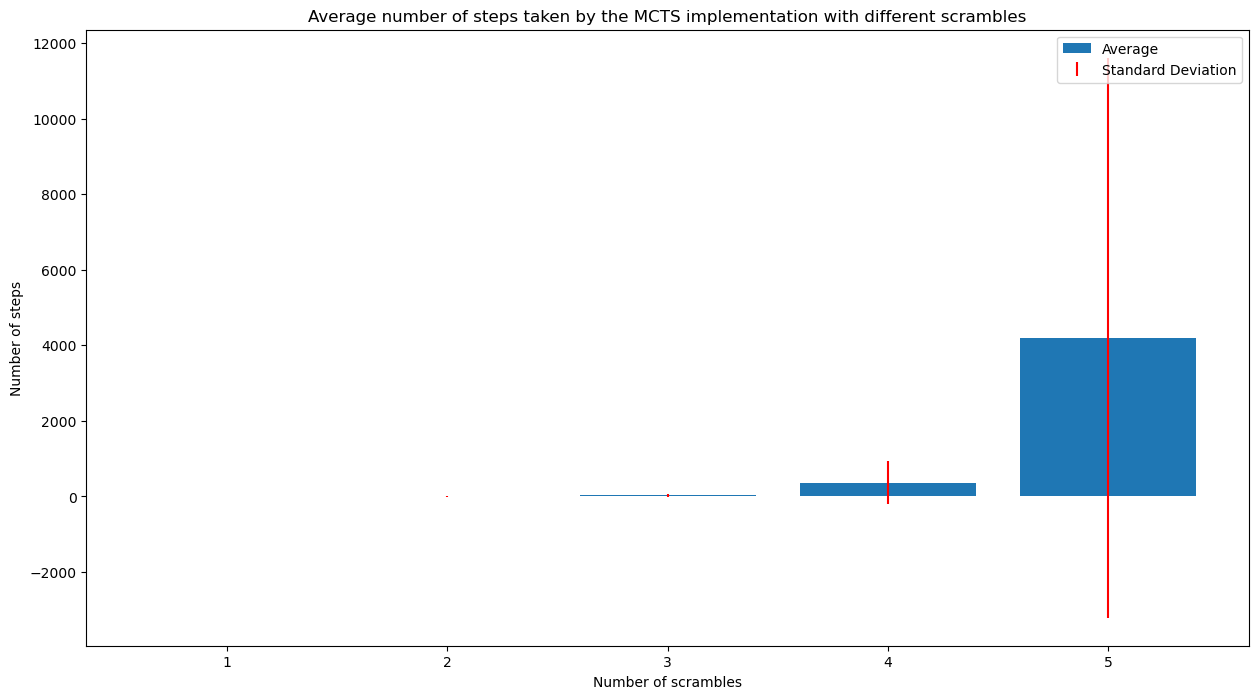

In [16]:
print('Total attempts:', total_attempts)
plt.bar(range(1, max_scramble_depth + 1), averages_of_succesful_attempts, label="Average")
plt.errorbar(range(1, max_scramble_depth + 1), averages_of_succesful_attempts, yerr = stds_of_succesful_attempts, fmt = 'none', ecolor = 'red', label="Standard Deviation")
plt.xlabel("Number of scrambles")
plt.ylabel("Number of steps")
plt.legend()
plt.title("Average number of steps taken by the MCTS implementation with different scrambles")

# A* Normal Network

In [39]:
algorithm = Astar(lam = 1, num_iter = num_iterations_per_solve, network_type = 'normal')

In [40]:
total_attempts = []
averages_of_succesful_attempts = []
stds_of_succesful_attempts = []

for scramble_depth in range(1, max_scramble_depth + 1):
    number_of_attempts = 0
    succesful_attempts_lengths = []
    for _ in tqdm(range(num_per_scramble_depth)):
        while True:
            cube = Cube()
            cube.scramble(scramble_depth)
            solution, steps_taken = algorithm.solve(cube, num_iterations_per_solve, return_steps_taken = True)
            number_of_attempts += 1
            if solution is not None:
                break
        succesful_attempts_lengths.append(steps_taken)
    print('Attempts: ', succesful_attempts_lengths)
    print('Mean: ', np.mean(succesful_attempts_lengths))
    print("Std: ", np.std(succesful_attempts_lengths))
    total_attempts.append(number_of_attempts)
    averages_of_succesful_attempts.append(np.mean(succesful_attempts_lengths))
    stds_of_succesful_attempts.append(np.std(succesful_attempts_lengths))

astar_data = {
    'total_attempts': total_attempts,
    'averages_of_succesful_attempts': averages_of_succesful_attempts,
    'stds_of_succesful_attempts': stds_of_succesful_attempts
}

with open('experiment_results/steps_to_solve_astar.pickle', 'wb') as f_astar:
    pickle.dump(astar_data, f_astar,protocol=pickle.HIGHEST_PROTOCOL)

100%|██████████| 30/30 [00:00<00:00, 229.54it/s]


Attempts:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Mean:  1.0
Std:  0.0


100%|██████████| 30/30 [00:00<00:00, 82.66it/s]


Attempts:  [2, 5, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Mean:  2.2333333333333334
Std:  0.6155395104206461


100%|██████████| 30/30 [00:03<00:00,  9.93it/s]


Attempts:  [19, 15, 14, 14, 14, 14, 22, 15, 15, 14, 14, 14, 16, 16, 14, 14, 14, 14, 16, 14, 14, 14, 15, 14, 19, 15, 15, 14, 14, 19]
Mean:  15.166666666666666
Std:  1.9677962857527254


100%|██████████| 30/30 [00:25<00:00,  1.15it/s]


Attempts:  [145, 132, 156, 136, 128, 128, 132, 136, 131, 132, 136, 128, 184, 2, 130, 130, 131, 135, 138, 159, 128, 128, 128, 128, 128, 137, 2, 128, 128, 128]
Mean:  126.4
Std:  35.28040060241191


100%|██████████| 30/30 [03:59<00:00,  7.98s/it]

Attempts:  [1195, 1196, 1310, 1200, 15, 1196, 1196, 1305, 1196, 1197, 1202, 1259, 1196, 1285, 1196, 1300, 1197, 1196, 1196, 1244, 1206, 1210, 1331, 1204, 1275, 1200, 1200, 1198, 1344, 1200]
Mean:  1188.1666666666667
Std:  222.83358264757928


Total attempts: [30, 30, 30, 30, 30]


Text(0.5, 1.0, 'Average number of steps taken by the A* implementation using the normal network with different scrambles')

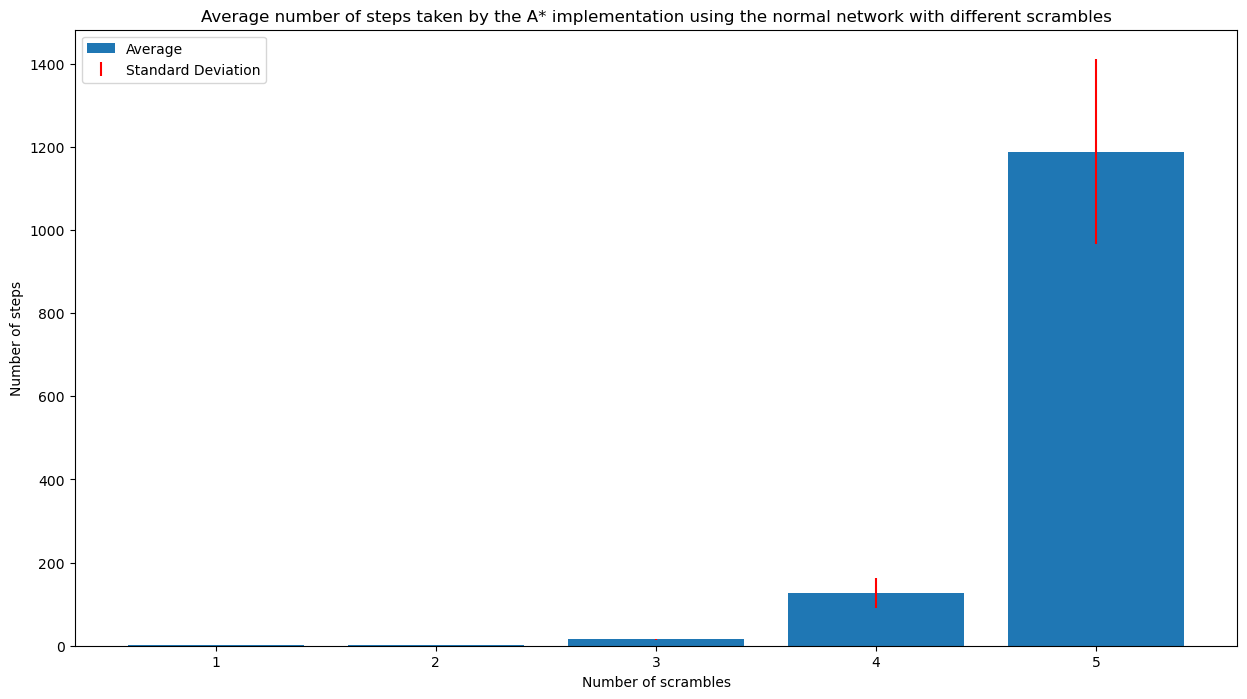

In [43]:
print('Total attempts:', total_attempts)
plt.bar(range(1, max_scramble_depth + 1), averages_of_succesful_attempts, label="Average")
plt.errorbar(range(1, max_scramble_depth + 1), averages_of_succesful_attempts, yerr = stds_of_succesful_attempts, fmt = 'none', ecolor = 'red', label="Standard Deviation")
plt.xlabel("Number of scrambles")
plt.ylabel("Number of steps")
plt.legend(loc='upper left')
plt.title("Average number of steps taken by the A* implementation using the normal network with different scrambles")

# A* Resnet Network

In [66]:
algorithm = Astar(lam = 1, num_iter = num_iterations_per_solve, network_type = 'resnet')

In [67]:
total_attempts = []
averages_of_succesful_attempts = []
stds_of_succesful_attempts = []

for scramble_depth in range(1, max_scramble_depth + 1):
    number_of_attempts = 0
    succesful_attempts_lengths = []
    for _ in tqdm(range(num_per_scramble_depth)):
        while True:
            cube = Cube()
            cube.scramble(scramble_depth)
            solution, steps_taken = algorithm.solve(cube, num_iterations_per_solve, return_steps_taken = True)
            number_of_attempts += 1
            if solution is not None:
                break
        succesful_attempts_lengths.append(steps_taken)
    print('Attempts: ', succesful_attempts_lengths)
    print('Mean: ', np.mean(succesful_attempts_lengths))
    print("Std: ", np.std(succesful_attempts_lengths))
    total_attempts.append(number_of_attempts)
    averages_of_succesful_attempts.append(np.mean(succesful_attempts_lengths))
    stds_of_succesful_attempts.append(np.std(succesful_attempts_lengths))

astar_resnet_data = {
    'total_attempts': total_attempts,
    'averages_of_succesful_attempts': averages_of_succesful_attempts,
    'stds_of_succesful_attempts': stds_of_succesful_attempts
}

with open('experiment_results/steps_to_solve_astar_resnet.pickle', 'wb') as f_astar_resnet:
    pickle.dump(astar_resnet_data, f_astar_resnet, protocol=pickle.HIGHEST_PROTOCOL)

100%|██████████| 30/30 [00:00<00:00, 109.14it/s]


Attempts:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Mean:  1.0
Std:  0.0


100%|██████████| 30/30 [00:06<00:00,  4.83it/s]


Attempts:  [32, 20, 10, 18, 3, 24, 2, 18, 2, 20, 3, 2, 4, 2, 2, 3, 20, 2, 2, 2, 79, 29, 2, 59, 2, 2, 8, 2, 20, 2]
Mean:  13.2
Std:  17.741476826916077


100%|██████████| 30/30 [00:30<00:00,  1.01s/it]


Attempts:  [165, 21, 112, 10, 125, 65, 27, 8, 60, 80, 160, 4, 48, 163, 43, 3, 143, 61, 11, 45, 203, 52, 71, 32, 31, 98, 6, 43, 4, 27]
Mean:  64.03333333333333
Std:  55.91093115145036


100%|██████████| 30/30 [01:33<00:00,  3.10s/it]


Attempts:  [299, 8, 327, 77, 63, 186, 3, 15, 303, 2, 126, 7, 4, 427, 170, 26, 61, 342, 486, 4, 282, 62, 63, 559, 614, 47, 33, 323, 993, 90]
Mean:  200.06666666666666
Std:  230.61279717791513


100%|██████████| 30/30 [14:44<00:00, 29.48s/it]

Attempts:  [2109, 115, 1593, 2726, 29, 422, 295, 147, 529, 2126, 1998, 24, 7, 487, 9249, 9698, 2214, 2428, 1504, 150, 2298, 3, 1937, 2808, 2518, 30, 1504, 8625, 257, 209]
Mean:  1934.6333333333334
Std:  2608.707617235443


Total attempts: [30, 30, 30, 30, 30]


Text(0.5, 1.0, 'Average number of steps taken by the A* implementation using the resnet network with different scrambles')

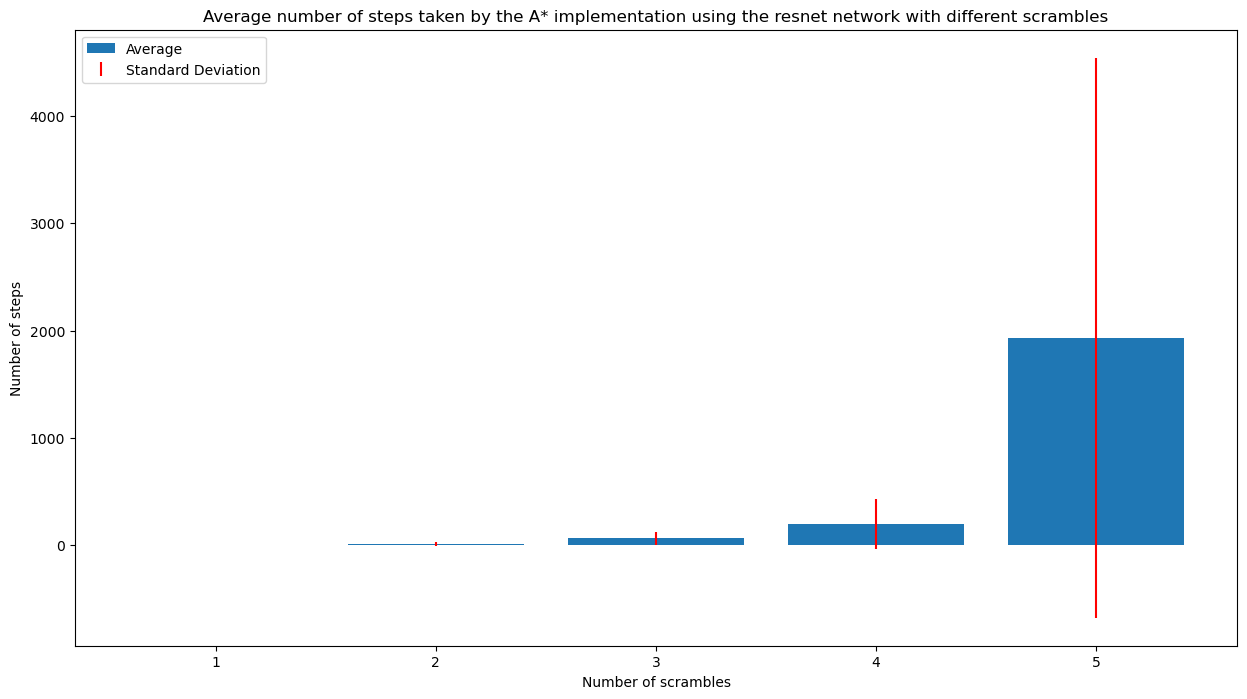

In [68]:
print('Total attempts:', total_attempts)
plt.bar(range(1, max_scramble_depth + 1), averages_of_succesful_attempts, label="Average")
plt.errorbar(range(1, max_scramble_depth + 1), averages_of_succesful_attempts, yerr = stds_of_succesful_attempts, fmt = 'none', ecolor = 'red', label="Standard Deviation")
plt.xlabel("Number of scrambles")
plt.ylabel("Number of steps")
plt.legend(loc='upper left')
plt.title("Average number of steps taken by the A* implementation using the resnet network with different scrambles")

# BFS

In [44]:
algorithm = BFS(num_iter = num_iterations_per_solve)

In [45]:
total_attempts = []
averages_of_succesful_attempts = []
stds_of_succesful_attempts = []

for scramble_depth in range(1, max_scramble_depth + 1):
    number_of_attempts = 0
    succesful_attempts_lengths = []
    for _ in tqdm(range(num_per_scramble_depth)):
        while True:
            cube = Cube()
            cube.scramble(scramble_depth)
            solution, steps_taken = algorithm.solve(cube, num_iterations_per_solve, return_steps_taken = True)
            number_of_attempts += 1
            if solution is not None:
                break
        succesful_attempts_lengths.append(steps_taken)
    print('Attempts: ', succesful_attempts_lengths)
    print('Mean: ', np.mean(succesful_attempts_lengths))
    print("Std: ", np.std(succesful_attempts_lengths))
    total_attempts.append(number_of_attempts)
    averages_of_succesful_attempts.append(np.mean(succesful_attempts_lengths))
    stds_of_succesful_attempts.append(np.std(succesful_attempts_lengths))

bfs_data = {
    'total_attempts': total_attempts,
    'averages_of_succesful_attempts': averages_of_succesful_attempts,
    'stds_of_succesful_attempts': stds_of_succesful_attempts
}

with open('experiment_results/steps_to_solve_bfs.pickle', 'wb') as f_bfs:
    pickle.dump(bfs_data, f_bfs,protocol=pickle.HIGHEST_PROTOCOL)

100%|██████████| 30/30 [00:00<00:00, 235.46it/s]


Attempts:  [9, 1, 7, 4, 6, 10, 10, 11, 2, 6, 11, 3, 4, 4, 1, 10, 6, 7, 10, 12, 10, 8, 3, 7, 12, 6, 2, 12, 11, 6]
Mean:  7.033333333333333
Std:  3.4591264150874212


100%|██████████| 30/30 [00:00<00:00, 36.47it/s]


Attempts:  [21, 56, 114, 98, 16, 101, 105, 44, 39, 16, 19, 86, 25, 103, 116, 108, 68, 71, 21, 81, 126, 119, 33, 93, 101, 87, 56, 100, 92, 68]
Mean:  72.76666666666667
Std:  35.1517503910624


100%|██████████| 30/30 [00:07<00:00,  4.11it/s]


Attempts:  [986, 1074, 645, 864, 1130, 1121, 241, 302, 1117, 771, 587, 723, 528, 372, 646, 918, 745, 250, 389, 955, 820, 525, 1145, 361, 231, 276, 613, 650, 536, 848]
Mean:  678.9666666666667
Std:  290.53003095874425


100%|██████████| 30/30 [01:18<00:00,  2.63s/it]


Attempts:  [11089, 6693, 5415, 9237, 8860, 7701, 8932, 3044, 9628, 10665, 6861, 6025, 5112, 1248, 10666, 9358, 8450, 5247, 9119, 4624, 42, 9316, 8583, 9385, 3161, 7871, 2740, 2980, 6673, 1207]
Mean:  6664.4
Std:  3065.9242608605537


100%|██████████| 30/30 [13:43<00:00, 27.44s/it]

Attempts:  [58941, 38052, 40656, 99119, 78670, 22067, 84481, 77282, 90704, 81093, 89917, 55835, 80658, 28879, 23113, 79288, 60963, 12085, 88255, 79698, 73701, 452, 37440, 86197, 64833, 24162, 19306, 81582, 28204, 71217]
Mean:  58561.666666666664
Std:  27938.658226351687


Total attempts: [30, 30, 30, 30, 30]


Text(0.5, 1.0, 'Average number of steps taken by the BFS implementation with different scrambles')

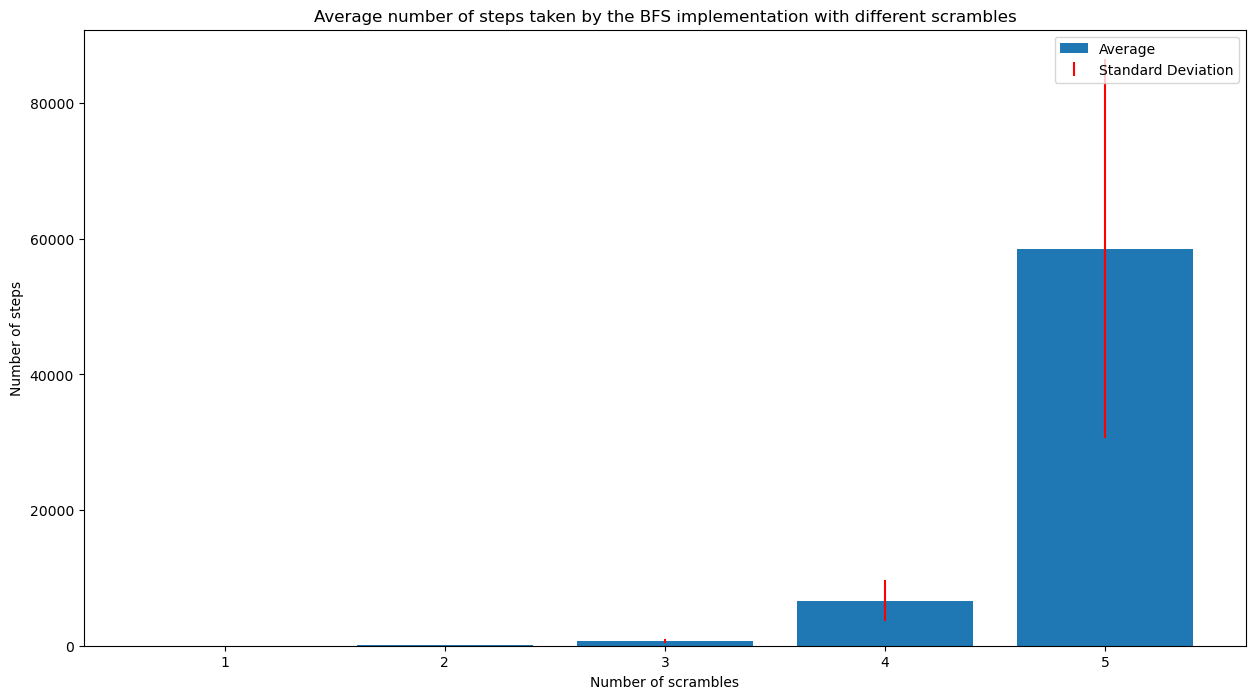

In [48]:
print('Total attempts:', total_attempts)
plt.bar(range(1, max_scramble_depth + 1), averages_of_succesful_attempts, label="Average")
plt.errorbar(range(1, max_scramble_depth + 1), averages_of_succesful_attempts, yerr = stds_of_succesful_attempts, fmt = 'none', ecolor = 'red', label="Standard Deviation")
plt.xlabel("Number of scrambles")
plt.ylabel("Number of steps")
plt.legend()
plt.title("Average number of steps taken by the BFS implementation with different scrambles")

# Comparison Chart

Text(0.5, 1.0, 'Combined chart of all the different algorithms, for comparison')

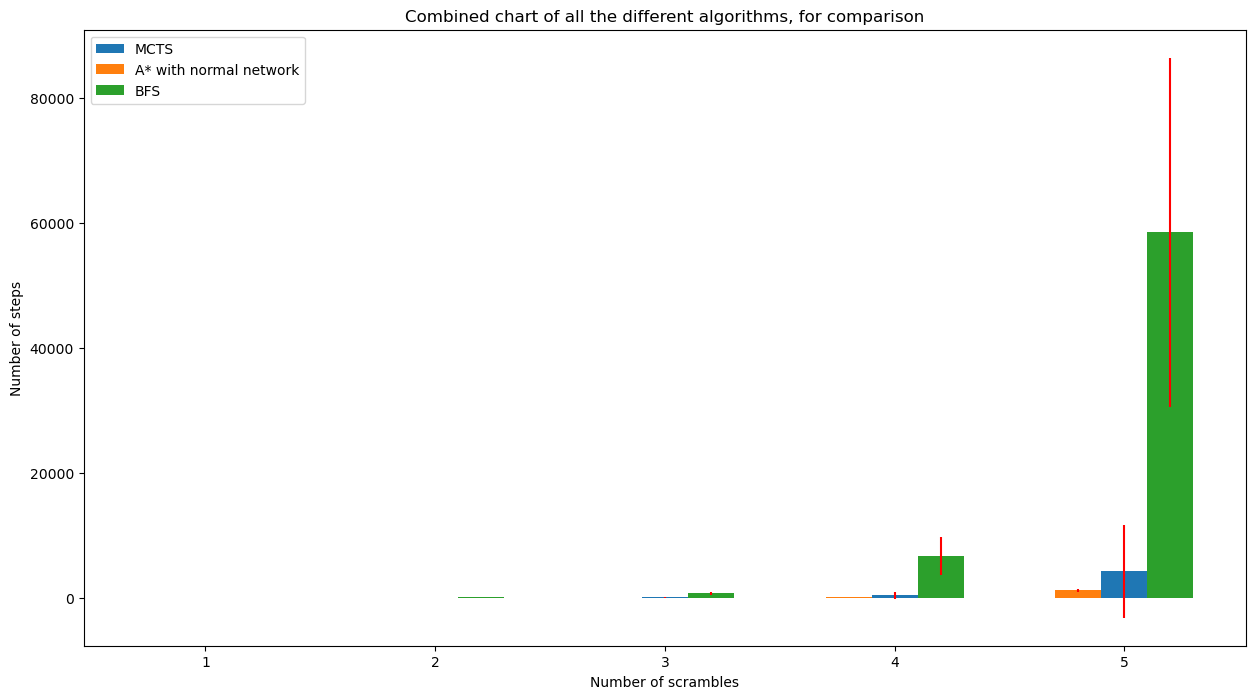

In [64]:
data_mcts = retrieve_experiment_data("mcts")
data_astar = retrieve_experiment_data("astar")
data_bfs = retrieve_experiment_data("bfs")

plt.bar(np.arange(1, max_scramble_depth + 1), data_mcts['averages_of_succesful_attempts'], 0.2, label="MCTS")
plt.errorbar(np.arange(1, max_scramble_depth + 1), data_mcts['averages_of_succesful_attempts'], 
             yerr = data_mcts['stds_of_succesful_attempts'], fmt = 'none', ecolor = 'red')

plt.bar(np.arange(1, max_scramble_depth + 1)-0.2, data_astar['averages_of_succesful_attempts'], 0.2, label="A* with normal network")
plt.errorbar(np.arange(1, max_scramble_depth + 1)-0.2, data_astar['averages_of_succesful_attempts'], 
             yerr = data_astar['stds_of_succesful_attempts'], fmt = 'none', ecolor = 'red')

plt.bar(np.arange(1, max_scramble_depth + 1)+0.2, data_bfs['averages_of_succesful_attempts'], 0.2, label="BFS")
plt.errorbar(np.arange(1, max_scramble_depth + 1)+0.2, data_bfs['averages_of_succesful_attempts'], 
             yerr = data_bfs['stds_of_succesful_attempts'], fmt = 'none', ecolor = 'red')

plt.xlabel("Number of scrambles")
plt.ylabel("Number of steps")
plt.legend(loc="upper left")

plt.title("Combined chart of all the different algorithms, for comparison")

